C:\Users\ghor3\AppData\Local\Temp\ipykernel_9892\1361705870.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame = frame.append([frameone])
C:\Users\ghor3\AppData\Local\Temp\ipykernel_9892\1361705870.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame = frame.append([frameone])
C:\Users\ghor3\AppData\Local\Temp\ipykernel_9892\1361705870.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame = frame.append([frameone])


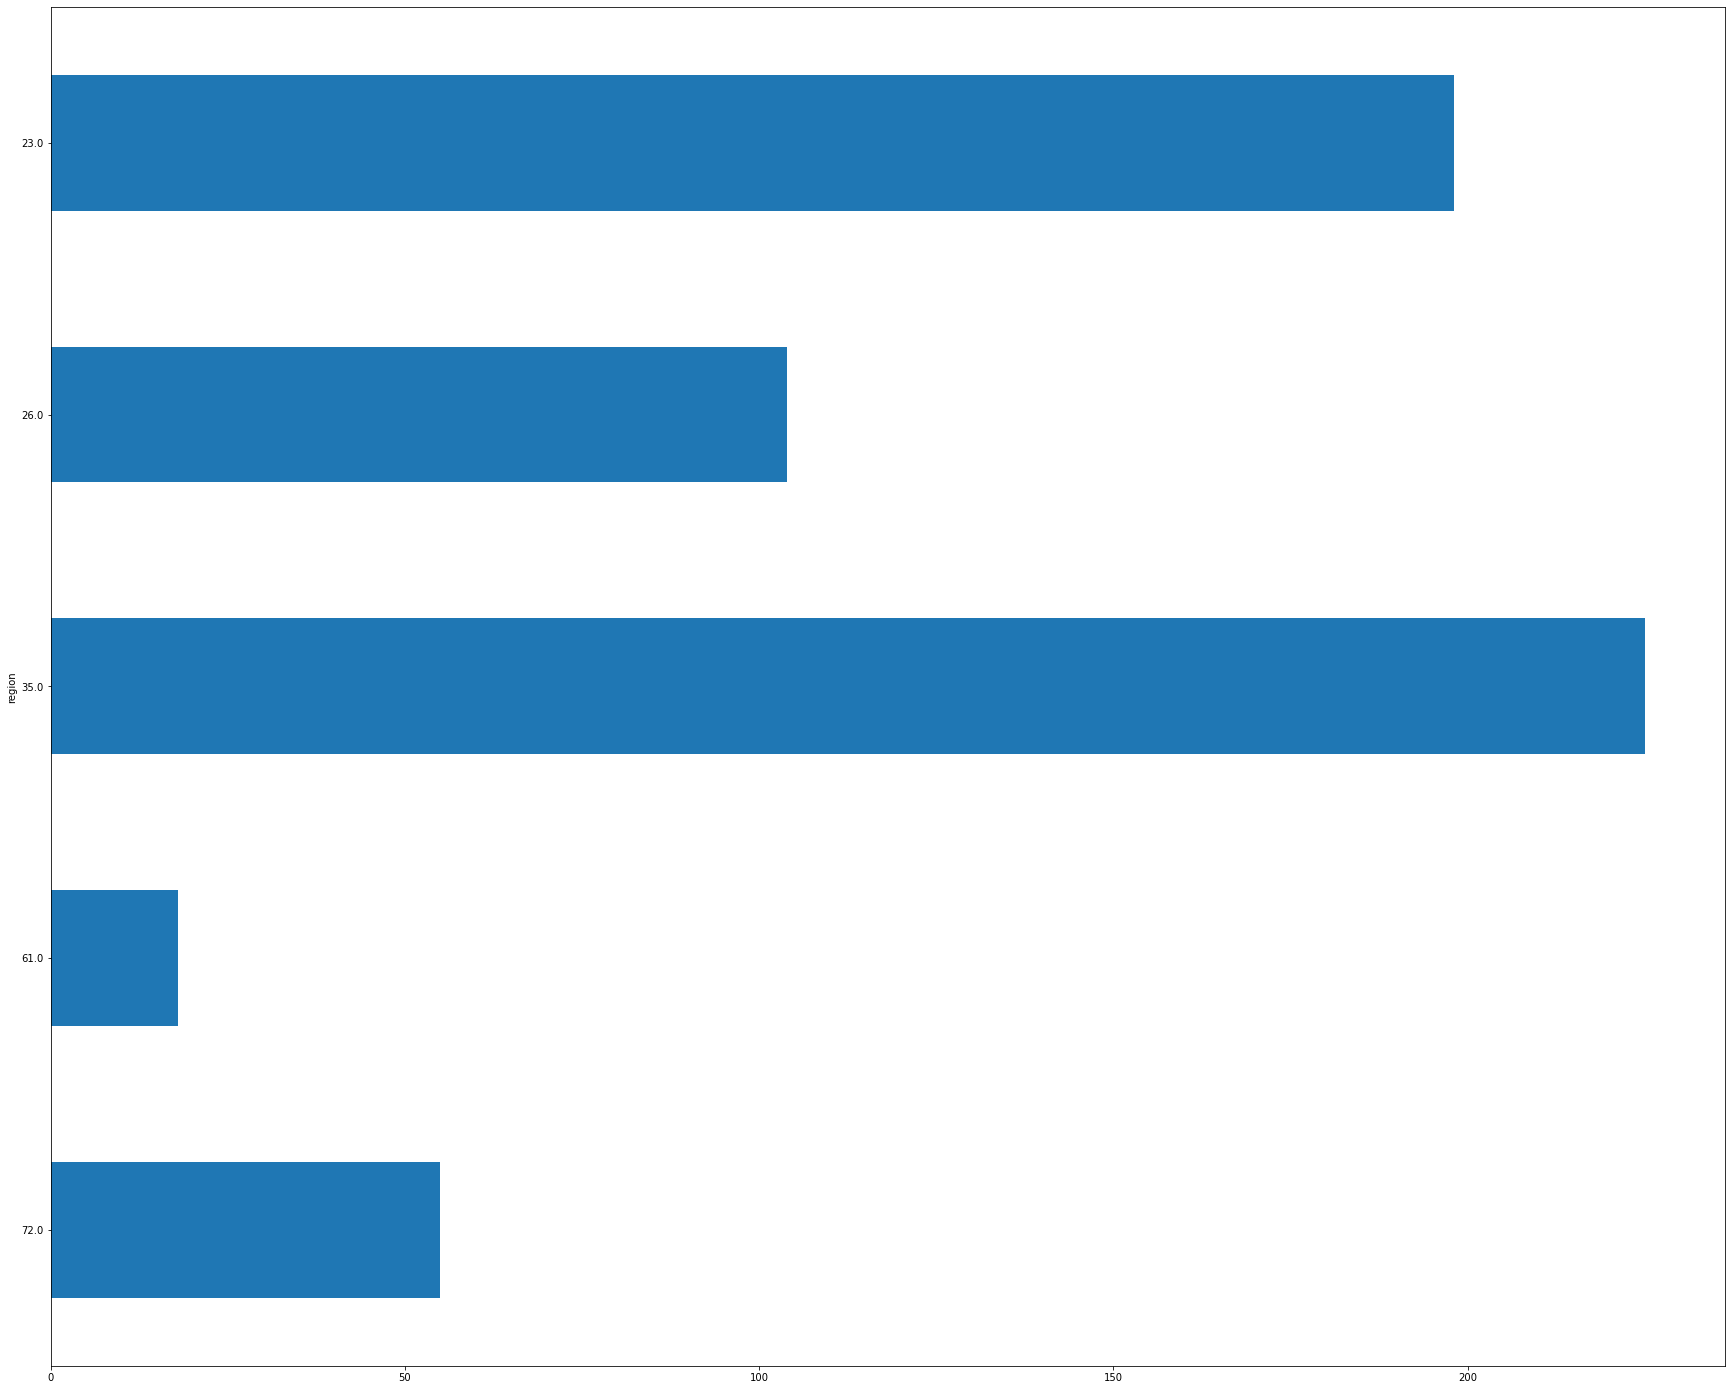

In [87]:
import pandas as pd
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams
offset_ = 0
limit_ = 10
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()
objects_data.get('data').get('list')[0]
objects_list = objects_data.get('data').get('list')
objids = [x.get('objId') for x in objects_list]
objids[:10]
def load_one(objids): 
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objids}' 
    res = requests.get(url) 
    objects_data = res.json() 
    return objects_data['data']
a = [] 
for i in objids: 
    a.append(load_one(i))
df_detal = pd.json_normalize(a)
h = df_detal.sort_values(by='region', ascending=False)
h = h.loc[h['objElemLivingCnt'] != 0]
h = h.reset_index(drop=True)
g1 = 0
frame = pd.DataFrame({'region': [],'price': []})
for f in range(len(h)):
    g2 = h['region'][f]
    if g2 != g1:
        h1 = h.loc[h['region'] == g2]
        j = h1["objElemLivingCnt"].mean()
        #print(j)
        g1 = g2
        frameone = pd.DataFrame({'region': [g2],'price': [j]})
        frame = frame.append([frameone])
        continue
frame = frame.reset_index(drop=True)
bm_price_series = frame.set_index('region')['price'] 
from pylab import rcParams
rcParams['figure.figsize'] = 30,25
bm_price_series.plot(kind='barh')
plt.show()


    

    
    
    
